<a href="https://colab.research.google.com/github/ymuto0302/PJ2024/blob/main/PJ_sales_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 3.4.1 売上データを用いた演習課題
Pandas バージョン

In [ ]:
# データフレームへの読み込み
import pandas as pd

df = pd.read_csv('sales_data.csv')
df.head()

,date,category,product,sales
0,2022-01-01,Electronics,Smartphone,500000
1,2022-01-01,Electronics,Laptop,750000
2,2022-01-01,Clothing,T-shirt,200000
3,2022-01-01,Clothing,Jeans,300000
4,2022-01-15,Electronics,Smartphone,450000


In [ ]:
# 各列のデータ型を確認
df.dtypes

date        object
category    object
product     object
sales        int64
dtype: object

In [ ]:
# 改めて，各列のデータ型を確認
df.dtypes

date        object
category    object
product     object
sales        int64
dtype: object

In [ ]:
# 基本的な統計量
df.describe()

,sales
count,43.000000
mean,374069.767442
std,253217.993356
min,75000.000000
25%,190000.000000
50%,320000.000000
75%,490000.000000
max,1000000.000000


In [ ]:
# category でグルーピングし，商品カテゴリ別の売上金額を求める
df2 = df.groupby(by='category')['sales'].sum()
df2

category
Accessories     1405000
Clothing        3300000
Electronics    11380000
Name: sales, dtype: int64

<Axes: xlabel='category'>

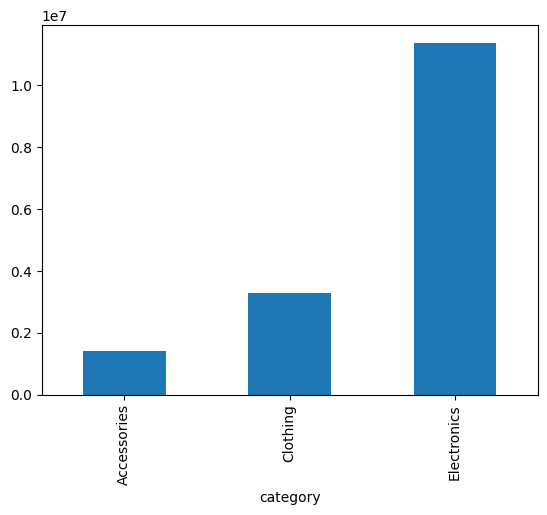

In [ ]:
# 棒グラフ
df2.plot.bar()

<Axes: ylabel='category'>

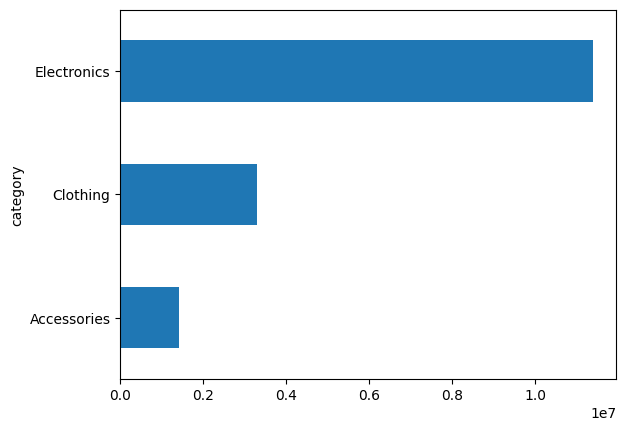

In [ ]:
# 棒グラフ
df2.plot.barh()

In [ ]:
# date 列を datetime 型へ変換
df['date'] = pd.to_datetime(df['date'])

In [ ]:
# 新たに「年・月のみ」の列を作る
df['year_month'] = df['date'].dt.strftime("%Y-%m")

In [ ]:
df.head()

,date,category,product,sales,year_month
0,2022-01-01,Electronics,Smartphone,500000,2022-01
1,2022-01-01,Electronics,Laptop,750000,2022-01
2,2022-01-01,Clothing,T-shirt,200000,2022-01
3,2022-01-01,Clothing,Jeans,300000,2022-01
4,2022-01-15,Electronics,Smartphone,450000,2022-01


In [ ]:
df.dtypes

date          datetime64[ns]
category              object
product               object
sales                  int64
year_month            object
dtype: object

In [ ]:
# 月別の売上推移を求めるため，グルーピング
df3 = df.groupby(by='year_month')['sales'].sum()
df3

year_month
2022-01    2800000
2022-02    2625000
2022-03    2490000
2022-04    2560000
2022-05    2930000
2022-06    2680000
Name: sales, dtype: int64

<Axes: xlabel='year_month'>

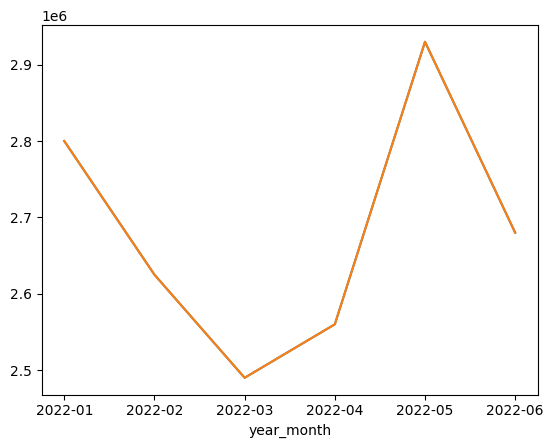

In [ ]:
df3.plot()
df3.plot.line()

In [ ]:
df4 = df2 / df2.sum()
df4

category
Accessories    0.087348
Clothing       0.205160
Electronics    0.707491
Name: sales, dtype: float64

<Axes: ylabel='sales'>

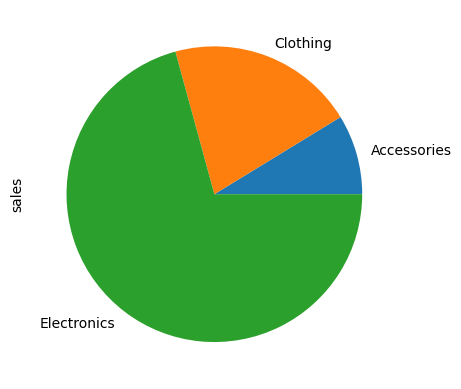

In [ ]:
# カテゴリ別売上を円グラフ
df4.plot.pie()

<Axes: ylabel='sales'>

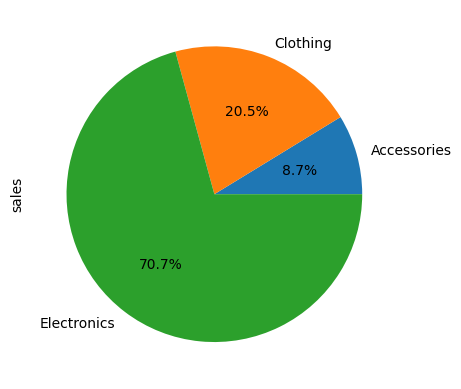

In [ ]:
# カテゴリ別売上を円グラフ
df4.plot.pie(autopct='%.1f%%')

In [ ]:
df5 = df.groupby(by='product')['sales'].sum()
df5

product
Bag            600000
Dress          750000
Jeans         1350000
Laptop        5250000
Smartphone    3730000
Sunglasses     345000
T-shirt       1200000
Tablet        2400000
Watch          460000
Name: sales, dtype: int64

In [ ]:
# 降順にソート
df5.sort_values(ascending=False)

product
Laptop        5250000
Smartphone    3730000
Tablet        2400000
Jeans         1350000
T-shirt       1200000
Dress          750000
Bag            600000
Watch          460000
Sunglasses     345000
Name: sales, dtype: int64

In [ ]:
# 降順にソートした上で，上位３件を取り出す
df5.sort_values(ascending=False)[:3]

product
Laptop        5250000
Smartphone    3730000
Tablet        2400000
Name: sales, dtype: int64

In [ ]:
help(pd.DataFrame.plot.barh)

Help on function barh in module pandas.plotting._core:

barh(self, x=None, y=None, **kwargs) -> 'PlotAccessor'
    Make a horizontal bar plot.
    
    A horizontal bar plot is a plot that presents quantitative data with
    rectangular bars with lengths proportional to the values that they
    represent. A bar plot shows comparisons among discrete categories. One
    axis of the plot shows the specific categories being compared, and the
    other axis represents a measured value.
    
    Parameters
    ----------
    x : label or position, optional
        Allows plotting of one column versus another. If not specified,
        the index of the DataFrame is used.
    y : label or position, optional
        Allows plotting of one column versus another. If not specified,
        all numerical columns are used.
    color : str, array-like, or dict, optional
        The color for each of the DataFrame's columns. Possible values are:
    
        - A single color string referred to by name

<Axes: ylabel='product'>

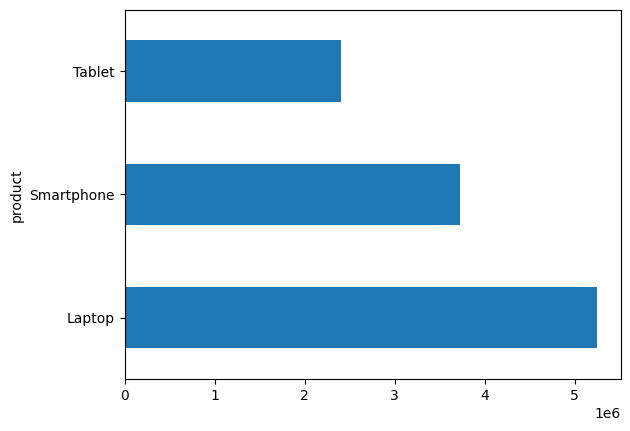

In [ ]:
# 降順にソート → 上位３件を取り出す → 横棒グラフ
df5.sort_values(ascending=False)[:3].plot.barh()

AttributeError: Rectangle.set() got an unexpected keyword argument 'invert'

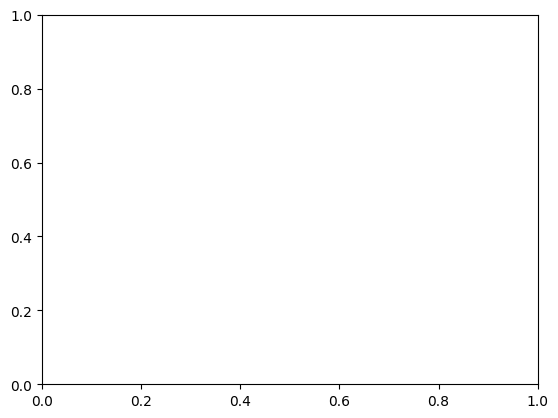

In [ ]:
df5.sort_values(ascending=False)[:3].plot.barh(invert=True)